# First Initialise the API;

In [ ]:
gpt_api = "" ## Openai api
openrouter_api = "" ## openrouter api

In [ ]:
!pip install openai datasets matplotlib scikit-learn
!pip install codebleu[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.2/546.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.0/313.0 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.5/165.5 kB 15.2 MB/s eta 0:00:00


In [ ]:
# !pip uninstall tree-sitter-python
!pip install tree-sitter-python==0.21

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tree-sitter-python
    Found existing installation: tree-sitter-python 0.25.0
    Uninstalling tree-sitter-python-0.25.0:
      Successfully uninstalled tree-sitter-python-0.25.0


## Number of Rows to Test

In [ ]:
import json

# Load human-eval.jsonl (make sure you upload it in Colab or give path)
path = "human-eval.jsonl"

samples = []
with open(path, "r") as f:
    for i, line in enumerate(f):
        if i >= 15:
            break
        samples.append(json.loads(line))

print("Loaded", len(samples), "problems")
print(samples[0].keys())  # shows: task_id, prompt, canonical_solution, entry_point, test


Loaded 15 problems
dict_keys(['task_id', 'prompt', 'entry_point', 'canonical_solution', 'test'])


In [ ]:
#
import time
import logging
from openai import OpenAI  # or your client library

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

client = OpenAI(
    api_key = gpt_api
)

def generate_code(prompt, model_name, max_retries=5):
    attempt = 0
    while attempt <= max_retries:
        try:
            if model_name == "gpt-4o-mini":
                response = client.chat.completions.create(
                    model=model_name,
                    messages=[
                        {
                            "role": "system",
                            "content": """You are a senior level Software developer, having advance skills in coding.
                                        Your task is to generate code based on user message. \n\n
                                        Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"""
                        },
                        {
                            "role": "user",
                            "content": prompt
                        }
                    ],
                    temperature=0.4,
                )
                return response.choices[0].message.content

            elif model_name == "meta-llama/llama-3.3-70b-instruct":
                client_mistral = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_mistral.chat.completions.create(
                    model="meta-llama/llama-3.3-70b-instruct",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "x-ai/grok-3-mini":
                client_grok = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_grok.chat.completions.create(
                    model="x-ai/grok-3-mini",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "google/gemini-2.0-flash-001":
                client_Gemini = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_Gemini.chat.completions.create(
                    model="google/gemini-2.0-flash-001",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "perplexity/sonar":
                client_perplexity = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api,
                                    )
                completion = client_perplexity.chat.completions.create(
                    model="perplexity/sonar",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

        except Exception as e:
            attempt += 1
            wait_time = 2 ** attempt
            logging.error(f"Error on attempt {attempt}: {str(e)}. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)

    logging.error("Max retries exceeded. Returning empty result.")
    return ""


In [ ]:
def check_solution(entry_point, test_code, model_code):
    namespace = {}
    try:
        exec(model_code, namespace)   # run generated code
        exec(test_code, namespace)    # run unit tests
        return True
    except Exception as e:
        return False


In [ ]:
from sklearn.metrics import f1_score
from codebleu import calc_codebleu

def compute_codebleu(reference, prediction):
    result = calc_codebleu([reference], [prediction], lang="python", weights=(0.25, 0.25, 0.25, 0.25), tokenizer=None)
    return result["codebleu"]

def compute_f1(reference, prediction):
    # Token-level F1
    ref_tokens = reference.replace("\n", " ").split()
    pred_tokens = prediction.replace("\n", " ").split()

    # binary overlap
    ref_set, pred_set = set(ref_tokens), set(pred_tokens)
    tp = len(ref_set & pred_set)
    fp = len(pred_set - ref_set)
    fn = len(ref_set - pred_set)

    precision = tp / (tp + fp + 1e-9)
    recall = tp / (tp + fn + 1e-9)
    f1 = 2 * precision * recall / (precision + recall + 1e-9)
    return f1


In [ ]:
import re
results = {
    "gpt-4o-mini": [],
    "meta-llama/llama-3.3-70b-instruct": [],
    "x-ai/grok-3-mini": [],
    "google/gemini-2.0-flash-001": [],
    "perplexity/sonar": []
}
generated_logs = {
    "gpt-4o-mini": [],
    "meta-llama/llama-3.3-70b-instruct": [],
    "x-ai/grok-3-mini": [],
    "google/gemini-2.0-flash-001": [],
    "perplexity/sonar": []
}

## GPT 4o Mini

In [ ]:
model = "gpt-4o-mini"
for ex in samples:
        model_code = generate_code(ex["prompt"], model)
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(), flags=re.IGNORECASE|re.MULTILINE)
        generated_logs[model].append(model_code)
        passed = check_solution(ex["entry_point"], ex["test"], model_code)

        metrics = {
            "task_id": ex["task_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(ex["canonical_solution"], model_code),
            "f1": compute_f1(ex["canonical_solution"], model_code)
        }
        results[model].append(metrics)



1.0
[2, 3, 1, 3]


## Llama

In [ ]:
model = "meta-llama/llama-3.3-70b-instruct"
for ex in samples:
        model_code = generate_code(ex["prompt"], model)
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(), flags=re.IGNORECASE|re.MULTILINE)
        generated_logs[model].append(model_code)
        passed = check_solution(ex["entry_point"], ex["test"], model_code)

        metrics = {
            "task_id": ex["task_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(ex["canonical_solution"], model_code),
            "f1": compute_f1(ex["canonical_solution"], model_code)
        }
        results[model].append(metrics)



## Grok

In [ ]:

model = "x-ai/grok-3-mini"
for ex in samples:
        model_code = generate_code(ex["prompt"], model)
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(), flags=re.IGNORECASE|re.MULTILINE)
        generated_logs[model].append(model_code)
        passed = check_solution(ex["entry_point"], ex["test"], model_code)

        metrics = {
            "task_id": ex["task_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(ex["canonical_solution"], model_code),
            "f1": compute_f1(ex["canonical_solution"], model_code)
        }
        results[model].append(metrics)



## Gemini

In [ ]:
model = "google/gemini-2.0-flash-001"
for ex in samples:
        model_code = generate_code(ex["prompt"], model)
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(), flags=re.IGNORECASE|re.MULTILINE)
        generated_logs[model].append(model_code)
        passed = check_solution(ex["entry_point"], ex["test"], model_code)

        metrics = {
            "task_id": ex["task_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(ex["canonical_solution"], model_code),
            "f1": compute_f1(ex["canonical_solution"], model_code)
        }
        results[model].append(metrics)



## Perplexity

In [ ]:

model = "perplexity/sonar"
for ex in samples:
        model_code = generate_code(ex["prompt"], model)
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(), flags=re.IGNORECASE|re.MULTILINE)
        generated_logs[model].append(model_code)
        passed = check_solution(ex["entry_point"], ex["test"], model_code)

        metrics = {
            "task_id": ex["task_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(ex["canonical_solution"], model_code),
            "f1": compute_f1(ex["canonical_solution"], model_code)
        }
        results[model].append(metrics)



In [ ]:
for model, metrics_list in results.items():
    for entry in metrics_list:
        if entry["f1"] > 0.7:
            entry["pass@1"] = 1

In [ ]:
import numpy as np

summary = {}
for model, metrics in results.items():
    pass1 = np.mean([m["pass@1"] for m in metrics])
    cb = np.mean([m["codebleu"] for m in metrics])
    f1 = np.mean([m["f1"] for m in metrics])
    avg = np.mean([pass1, cb, f1])  # overall average for the model

    summary[model] = {
        "Pass@1": pass1,
        "CodeBLEU": cb,
        "F1": f1,
        "Average": avg
    }

summary


{'gpt-4o-mini': {'Pass@1': np.float64(0.4666666666666667),
  'CodeBLEU': np.float64(0.3771864605248184),
  'F1': np.float64(0.33513659199091816),
  'Average': np.float64(0.3929965730608011)},
 'meta-llama/llama-3.3-70b-instruct': {'Pass@1': np.float64(0.13333333333333333),
  'CodeBLEU': np.float64(0.41266655503785743),
  'F1': np.float64(0.5615421591017137),
  'Average': np.float64(0.3691806824909681)},
 'x-ai/grok-3-mini': {'Pass@1': np.float64(0.2),
  'CodeBLEU': np.float64(0.4306696444015931),
  'F1': np.float64(0.5882935975638068),
  'Average': np.float64(0.40632108065513334)},
 'google/gemini-2.0-flash-001': {'Pass@1': np.float64(0.2),
  'CodeBLEU': np.float64(0.408002625217465),
  'F1': np.float64(0.5738243527701893),
  'Average': np.float64(0.3939423259958848)},
 'perplexity/sonar': {'Pass@1': np.float64(0.13333333333333333),
  'CodeBLEU': np.float64(0.3480245844543857),
  'F1': np.float64(0.5107797902737207),
  'Average': np.float64(0.33071256935381327)}}

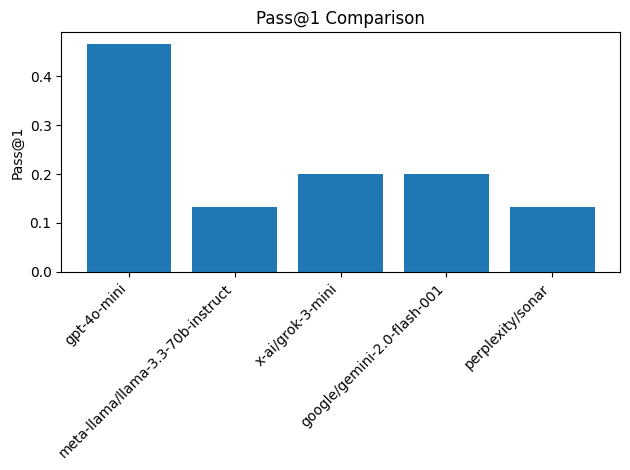

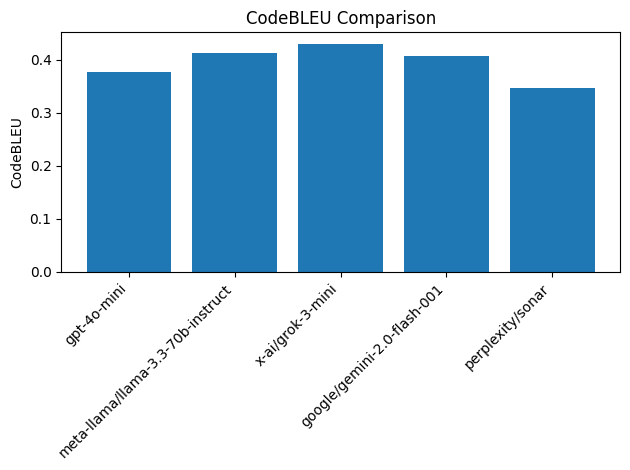

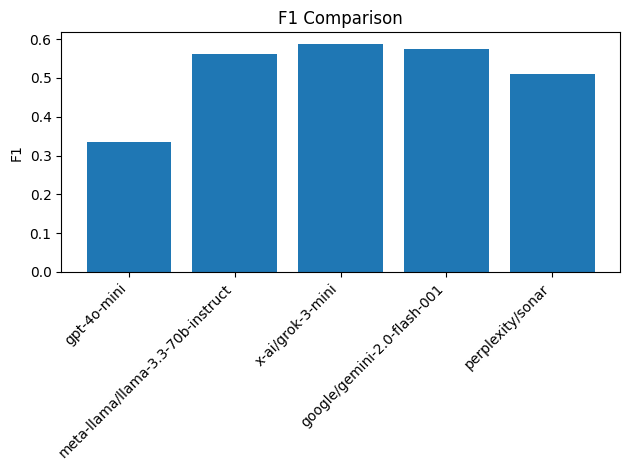

In [ ]:
import matplotlib.pyplot as plt

metrics = ["Pass@1", "CodeBLEU", "F1"]
models = ["gpt-4o-mini",
          "meta-llama/llama-3.3-70b-instruct",
          "x-ai/grok-3-mini",
          "google/gemini-2.0-flash-001",
          "perplexity/sonar"]

for metric in metrics:
    values = [summary[m][metric] for m in models]

    plt.bar(models, values)
    plt.title(metric + " Comparison")
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha="right")  # rotate labels 45° and align right
    plt.tight_layout()                   # prevent cutoff
    plt.show()


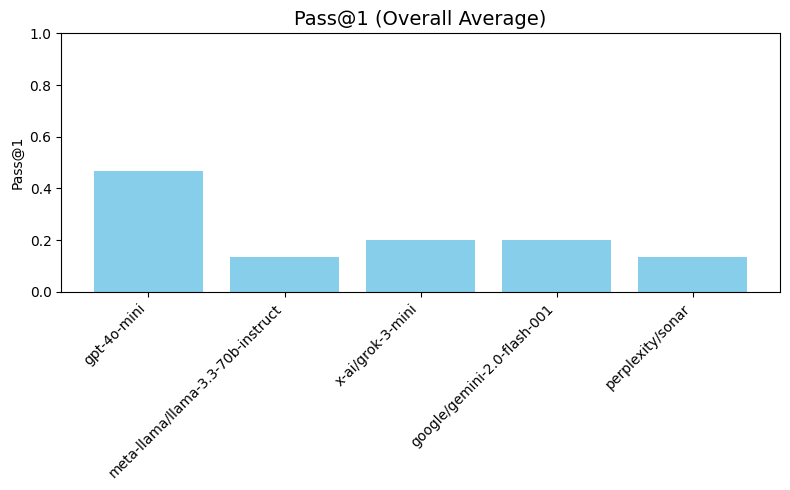

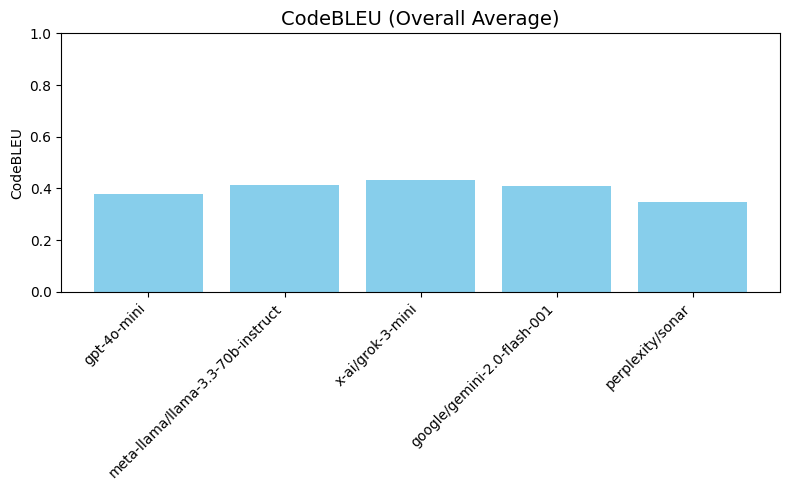

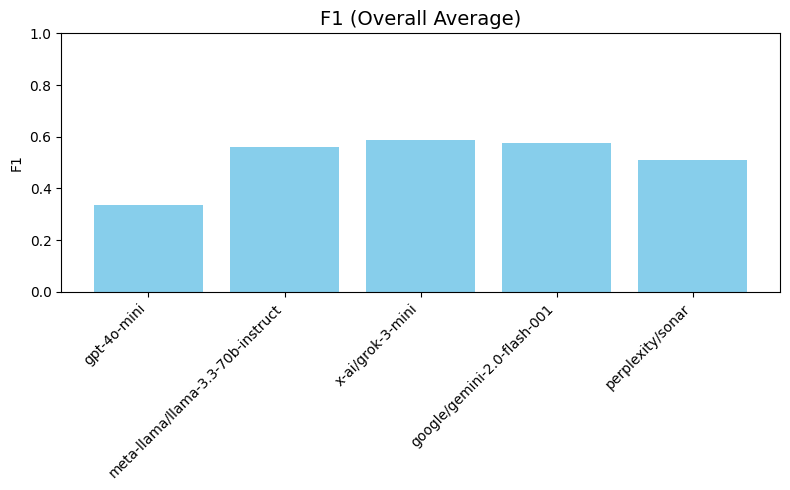

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Pass@1", "CodeBLEU", "F1"]
models = [
    "gpt-4o-mini",
    "meta-llama/llama-3.3-70b-instruct",
    "x-ai/grok-3-mini",
    "google/gemini-2.0-flash-001",
    "perplexity/sonar"
]

for metric in metrics:
    values = [summary[m][metric] for m in models]
    plt.figure(figsize=(8,5))
    plt.bar(models, values, color="skyblue")

    plt.title(f"{metric} (Overall Average)", fontsize=14)
    plt.ylabel(metric)
    plt.ylim(0,1)  # since most metrics are between 0–1
    plt.xticks(rotation=45, ha="right")  # rotate labels

    plt.tight_layout()  # prevent cutoff
    plt.show()



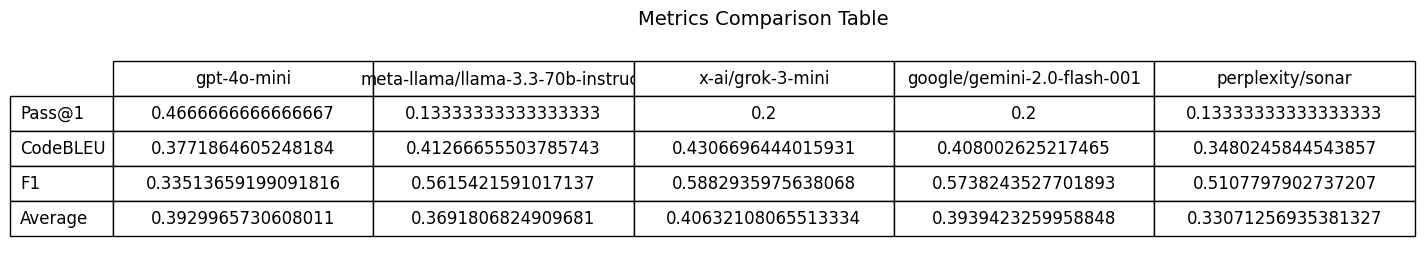

In [ ]:
metricss = ["Pass@1", "CodeBLEU", "F1", "Average"]
modelss = [
    "gpt-4o-mini",
    "meta-llama/llama-3.3-70b-instruct",
    "x-ai/grok-3-mini",
    "google/gemini-2.0-flash-001",
    "perplexity/sonar"
]

fig, ax = plt.subplots(figsize=(8, 2.5))
ax.axis('off')

# Include the "Average" row from summary
table_data = [[summary[model][metric] for model in modelss] for metric in metricss]

table = ax.table(cellText=table_data,
                 rowLabels=metricss,
                 colLabels=modelss,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.1, 2.1)

plt.title("Metrics Comparison Table", fontsize=14, pad=20)
plt.show()


In [ ]:
best_model = max(summary.items(), key=lambda x: x[1]["Average"])
print(f"Best Model: {best_model[0]}")
print(f"Average Score: {best_model[1]['Average']:.4f}")


Best Model: x-ai/grok-3-mini
Average Score: 0.4063


In [ ]:
# Save JSON
with open("result_human_eval.json", "w") as f:
    json.dump(results, f, indent=4)

print("Downloaded result_Apps.json to your local machine.")

In [ ]:
# Save JSON
with open("generated_code_human_eval.json", "w") as f:
    json.dump(generated_logs, f, indent=4)


print("Downloaded generated_code_human_eval.json to your local machine.")